<a href="https://colab.research.google.com/github/12Nepo/regresion_lineal/blob/main/ACT_6_1_California.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("CaliL.csv")
df

,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,0,958.0,2.020000e+13,1169.0,1.0,1.0,37.770280,-122.433170,3,1.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",202,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,1,5858.0,2.020000e+13,8904.0,2.0,2.0,37.744740,-122.420890,4,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",235,t,06/03/2023,03/05/2009,06/08/2017,license,f
2,2,8142.0,2.020000e+13,21994.0,13.0,14.0,37.765550,-122.452130,1,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56,t,06/03/2023,08/09/2014,27/10/2022,license,f
3,3,8339.0,2.020000e+13,24215.0,2.0,6.0,37.775640,-122.436420,4,2.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",575,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,4,8739.0,2.020000e+13,7149.0,2.0,2.0,37.760300,-122.421970,3,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6931,6931,27790615.3,2.020000e+13,87507815.4,9.0,9.0,37.791994,-122.410000,2,1.0,...,Entire home/apt,1 bath,"[""Security cameras on property"", ""Self check-i...",164,t,06/03/2023,sin informacion,sin informacion,147904,t
6932,6932,27790615.3,2.020000e+13,87507815.4,1.0,1.0,37.763060,-122.432023,2,1.0,...,Entire home/apt,1 bath,"[""Cooking basics"", ""Luggage dropoff allowed"", ...",228,t,06/03/2023,03/03/2023,03/03/2023,2023-001477STR,f
6933,6933,27790615.3,2.020000e+13,87507815.4,1.0,1.0,37.777633,-122.416478,1,1.0,...,Private room,1 shared bath,"[""TV"", ""Free dryer \u2013 In unit"", ""Mountain ...",104,t,06/03/2023,sin informacion,sin informacion,license,f
6934,6934,27790615.3,2.020000e+13,87507815.4,3.0,4.0,37.738325,-122.396603,2,1.0,...,Private room,1 shared bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Centr...",65,t,06/03/2023,sin informacion,sin informacion,2022-012562STR,f


In [ ]:
DFF = df[df["room_type"].isin(["Private room", "Hotel room"])]

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

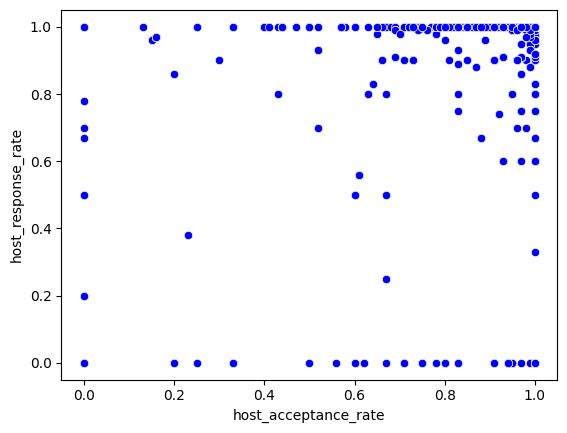

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=DFF)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= DFF[['host_acceptance_rate']]
Var_Dep= DFF['host_response_rate']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.81452495]),
 'rank_': 1,
 'singular_': array([17.93824581]),
 'intercept_': 0.15530490118210238}

Modelo matematico: y=0.81452495 + 0.15530490118210238

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.6022300397698575

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.7760348186581949

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

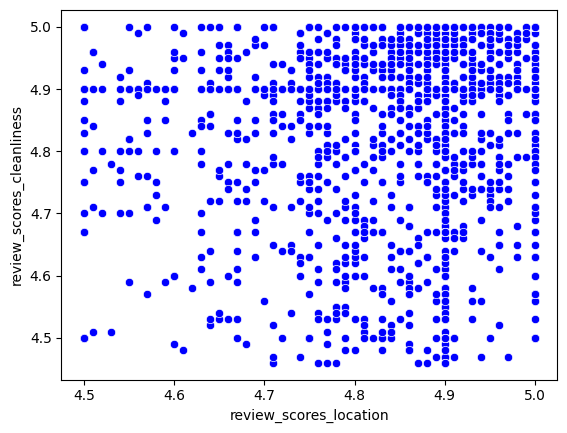

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="blue", data=DFF)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= DFF[['review_scores_location']]
Var_Dep= DFF['review_scores_cleanliness']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.26647726]),
 'rank_': 1,
 'singular_': array([5.94648584]),
 'intercept_': 3.5525474022508527}

Modelo matematico: y= 0.26647726 + 3.5525474022508527

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.056127651964810066

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2369127517986528

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

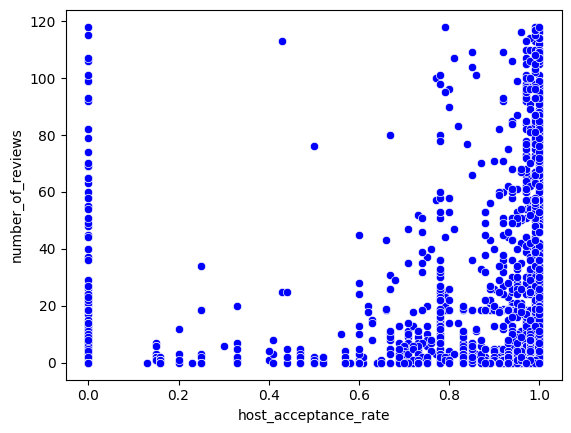

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="blue", data=DFF)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= DFF[['host_acceptance_rate']]
Var_Dep= DFF['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([15.62379863]),
 'rank_': 1,
 'singular_': array([17.93824581]),
 'intercept_': 7.643948049860013}

Modelo matematico: y= 15.62379863 + 7.643948049860013

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.045945693602773896

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.21434946606598743

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

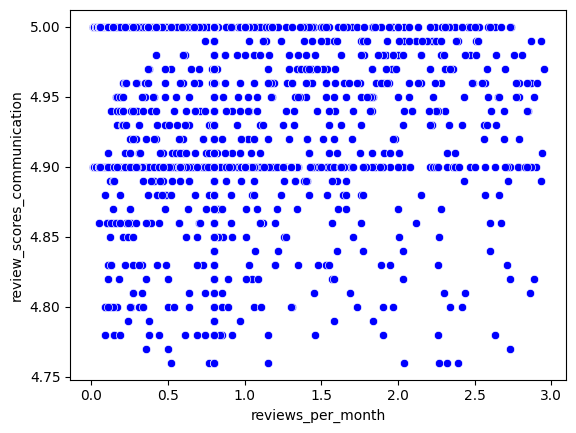

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="blue", data=DFF)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= DFF[['reviews_per_month']]
Var_Dep= DFF['review_scores_communication']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.01912069]),
 'rank_': 1,
 'singular_': array([32.71977177]),
 'intercept_': 4.949218865812791}

Modelo matematico: y= --0.01912069 + 4.949218865812791

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.050184787318095614

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.22401961369062223

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

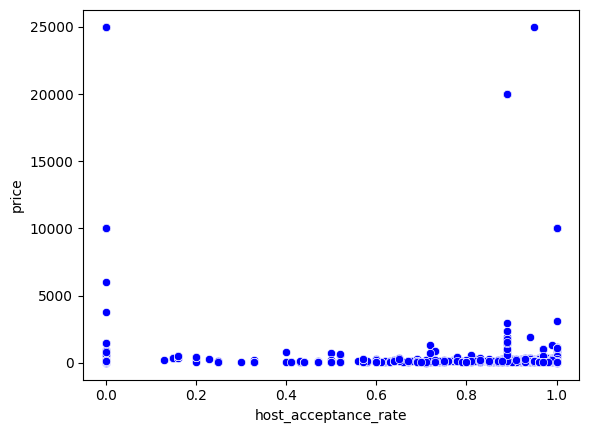

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=DFF)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= DFF[['host_acceptance_rate']]
Var_Dep= DFF['price']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-116.11846857]),
 'rank_': 1,
 'singular_': array([17.93824581]),
 'intercept_': 530.6575468344669}

Modelo matematico: y= -116.11846857 + 530.6575468344669

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0004414520467006522

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.021010760259939483

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

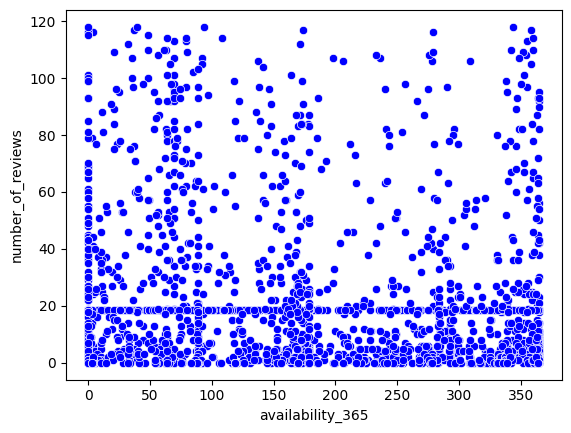

In [ ]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='availability_365', y='number_of_reviews', color="blue", data=DFF)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= DFF[['availability_365']]
Var_Dep= DFF['number_of_reviews']

In [ ]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.02155695]),
 'rank_': 1,
 'singular_': array([6642.08856193]),
 'intercept_': 23.58086237645754}

Modelo matematico: y= -0.02155695 + 23.58086237645754

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.011992113928495307

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.10950851075827535